## Q1. What is the purpose of grid search cv in machine learning, and how does it work?

Grid Search Cross-Validation (GridSearchCV) is a hyperparameter tuning technique in machine learning that helps find the optimal set of hyperparameters for a model. The purpose of GridSearchCV is to systematically search through a predefined set of hyperparameter combinations and evaluate the model's performance using cross-validation. The goal is to identify the hyperparameter values that result in the best model performance on unseen data.

Here's how GridSearchCV works:

**1. Define Hyperparameter Grid:**

Specify a grid of hyperparameter values or ranges to be explored. For example, you might provide different values for learning rates, regularization parameters, or tree depths.

**2. Cross-Validation:**

Divide the training dataset into multiple folds (e.g., k-folds) to create training and validation sets.
For each combination of hyperparameters in the grid:
- Train the model on the training set.
- Evaluate the model on the validation set.
- Record the performance metric (e.g., accuracy, F1-score, etc.).

**3. Model Selection:**

Select the set of hyperparameters that yielded the best performance across all cross-validation folds.
Evaluate on Test Set:

Optionally, evaluate the model with the selected hyperparameters on a separate test set that was not used during the hyperparameter tuning process.
The primary advantages of using GridSearchCV include:

**4. Exhaustive Search:**

GridSearchCV performs an exhaustive search over all possible combinations of hyperparameters in the specified grid.

**5. Automated Hyperparameter Tuning:**

It automates the process of hyperparameter tuning, allowing you to find the optimal hyperparameter values without manually trying different combinations.

**6. Improved Generalization:**

By using cross-validation, GridSearchCV provides a more reliable estimate of the model's performance on unseen data, helping to avoid overfitting to a specific training-validation split.

**7. Saves Time and Effort:**

It saves time and effort compared to manual tuning, especially when dealing with a large number of hyperparameters or a wide range of potential values.
Here's a simplified example using Python and scikit-learn:

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 'scale']}

# Create a support vector machine classifier
svm = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_


## Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?

Grid Search Cross-Validation (GridSearchCV) and Randomized Search Cross-Validation (RandomizedSearchCV) are both hyperparameter tuning techniques used in machine learning, but they differ in their approaches to exploring the hyperparameter space.

#### Grid Search Cross-Validation:

**Approach:**
- Grid Search exhaustively searches through all possible combinations of hyperparameter values specified in a predefined grid.
- It evaluates the model's performance for each combination using cross-validation and selects the combination with the best performance.

**Pros:**
- Guarantees that all possible combinations are tried, ensuring a comprehensive search.
- Suitable when the hyperparameter space is relatively small or when you have specific values you want to explore.

**Cons:**
- Can be computationally expensive and time-consuming, especially when the hyperparameter space is large.

#### Randomized Search Cross-Validation:

**Approach:**
- Randomized Search samples a fixed number of hyperparameter combinations from the specified distribution of hyperparameter values.
- It evaluates the model's performance for each sampled combination using cross-validation.

**Pros:**
- More computationally efficient, as it doesn't need to explore all possible combinations.
- Suitable for a large hyperparameter space, where an exhaustive search would be impractical.

**Cons:**
- There's a chance of missing the optimal combination, especially if the number of samples is too low.

#### When to Choose One Over the Other:

**Grid Search:**

- Choose Grid Search when you have a relatively small hyperparameter space, and you want to explore all possible combinations systematically.
- Use Grid Search when computational resources are not a significant constraint, and you want to ensure an exhaustive search.

**Randomized Search:**

- Choose Randomized Search when the hyperparameter space is large, and exploring all combinations is computationally expensive or impractical.
- Use Randomized Search when you want to balance the trade-off between exploration and exploitation, allowing for a more efficient search in large hyperparameter spaces.
- Particularly useful when you have limited computational resources or need to quickly narrow down the search space.

**Guidelines:**

- If the hyperparameter space is small and computational resources are sufficient, Grid Search is a reasonable choice.
- If the hyperparameter space is large or computational resources are limited, Randomized Search may be a more practical and efficient option.

In practice, a combination of both approaches can also be employed. You might start with a Randomized Search to explore a broader range of hyperparameters and then use the insights gained to perform a more focused Grid Search around promising regions of the hyperparameter space.

## Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.


In machine learning, data leakage refers to the unintentional inclusion of information in the training data that shouldn't be available during prediction on new, unseen data. This can lead to misleadingly high performance during training and model development, but ultimately results in poor performance when deployed in the real world.

**Why is it a problem?**

Data leakage creates a false sense of security, misleading developers into believing they have a well-performing model. When deployed, the model encounters data it wasn't prepared for, lacking the information it "learned" from during training. This leads to:

- Unrealistic expectations: Deceptive performance during development can lead to misguided investments and decisions based on inflated expectations.
- Poor model generalization: The model fails to adapt to unseen data, leading to inaccurate predictions and potentially harmful consequences depending on the application.
- Wasted resources: Time and effort spent developing a model with artificially inflated performance are ultimately wasted.

**Example:**

Imagine building a spam filter model. During development, you might accidentally include information about the actual sender's identity (e.g., known spammer email address) in the training data. This "leakage" allows the model to almost perfectly categorize emails during training, but in reality, it's not learning to identify spam based on content alone. When deployed, the model encounters new emails without sender information, leading to inaccurate classifications and potentially missing real spam messages.

**Common types of data leakage:**

- Target leakage: When information about the target variable (what you're trying to predict) is present in the training data but shouldn't be available during prediction.
- Feature leakage: When features used for prediction are derived from information not available during prediction.
- Temporal leakage: When data from the future is used to train a model for predicting the present or past.

**Preventing data leakage:**

- Careful data preparation: Thoroughly review data pipelines and feature engineering processes to eliminate any unintended information leaks.
- Cross-validation: Use proper cross-validation techniques that ensure the model is evaluated on data it hasn't seen during training.
- Domain knowledge: Leverage your understanding of the problem and data to identify potential leakage points.
By understanding data leakage and taking precautions, you can develop more reliable and generalizable machine learning models that perform well in real-world scenarios.

## Q4. How can you prevent data leakage when building a machine learning model?

Preventing data leakage is crucial when building a machine learning model to ensure that the model's performance estimates are realistic and that it generalizes well to new, unseen data. Here are several strategies to prevent data leakage:

**Temporal Split:**

- For time-related data, split the dataset chronologically, ensuring that the training data precedes the validation and test data.
- This prevents the model from learning patterns associated with future information that would not be available at the time of prediction.

**Holdout Sets:**

- Keep a holdout set that is completely independent and is not used during the model development process.
- Reserve this set for the final evaluation of the model's performance on entirely unseen data.

**Feature Engineering:**

- Carefully engineer features to avoid including information that would not be available at the time of prediction.
- Exclude features that directly or indirectly leak information about the target variable or contain future information.

**Avoid Using Future Information:**

- Do not use information that would not be available at the time of prediction to create the model.
- Ensure that features used for model training are based on information available up to the point in time being predicted.

**Be Mindful of Data Sources:**

- Be cautious when incorporating external data sources, as they may introduce information that was not available at the time of prediction.
- Scrutinize the data sources to ensure they align with the time frame and context of the problem.

**Strict Cross-Validation:**

- When using cross-validation, ensure that each fold maintains the temporal order of the data to avoid introducing future information into the training process.

**Regularly Review and Update Preprocessing Steps:**

- Regularly review preprocessing steps to identify and address potential sources of leakage.
- As datasets evolve, ensure that preprocessing steps are updated to maintain the integrity of the training-validation-test split.

**Document and Validate Steps:**

- Document all data preprocessing steps and model development procedures to facilitate transparency and reproducibility.
- Validate that each step is consistent with the goal of preventing data leakage.

**Check Feature Distributions:**

- Periodically check feature distributions, especially if the data evolves over time.
- Ensure that the distribution of features in the training set is representative of the distribution in the validation and test sets.

**Perform Sensitivity Analysis:**

- Conduct sensitivity analyses to assess how variations in the data impact the model's performance.
- Evaluate the model's robustness to changes in the data and identify potential sources of leakage.

By adopting these preventive measures, practitioners can minimize the risk of data leakage during the model development process, leading to more accurate assessments of the model's performance and better generalization to new, unseen data. Regular diligence in checking and updating procedures is crucial, especially when working with evolving datasets or changing problem contexts.

## Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?


A confusion matrix is a table that is used to evaluate the performance of a classification model. It provides a comprehensive view of how well a model has performed in terms of making predictions across different classes. The confusion matrix is particularly useful in binary classification problems, where there are two classes (positive and negative), but it can be extended to multiclass classification scenarios.

Here are the components of a confusion matrix:

- True Positive (TP):

Instances that are actually positive and are correctly predicted as positive by the model.
- True Negative (TN):

Instances that are actually negative and are correctly predicted as negative by the model.
- False Positive (FP):

Instances that are actually negative but are incorrectly predicted as positive by the model (Type I error).
- False Negative (FN):

Instances that are actually positive but are incorrectly predicted as negative by the model (Type II error).

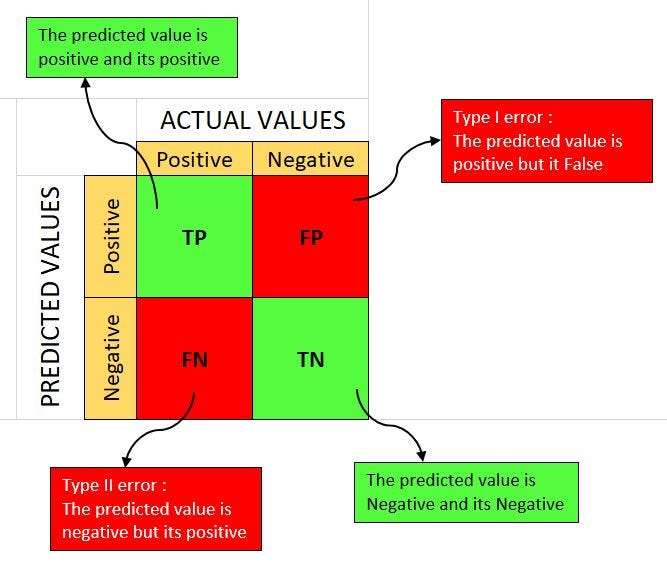

## Q6. Explain the difference between precision and recall in the context of a confusion matrix.

Precision and recall are two important metrics in the context of a confusion matrix, particularly in binary classification problems. They provide insights into different aspects of a model's performance, focusing on the trade-off between making positive predictions and capturing all actual positive instances.

**Precision:**

- **Formula:**

**Precision= TP/(TP+FP)**
 
- **Interpretation:**
- Precision measures the accuracy of positive predictions made by the model.
- It is the ratio of correctly predicted positive instances (True Positives) to the total instances predicted as positive (True Positives + False Positives).
- Precision is concerned with minimizing false positives. A high precision indicates that when the model predicts positive, it is likely to be correct.

**Recall (Sensitivity or True Positive Rate):**

- **Formula: **

**Recall= TP/(TP+FN)**
 
- **Interpretation:**
- Recall measures the ability of the model to capture all actual positive instances.
- It is the ratio of correctly predicted positive instances (True Positives) to the total actual positive instances (True Positives + False Negatives).
- Recall is concerned with minimizing false negatives. A high recall indicates that the model can identify most of the actual positive instances.

**Differences:**

- **Focus on Prediction Accuracy:**

- Precision: Focuses on the accuracy of positive predictions made by the model, emphasizing the proportion of predicted positives that are truly positive.
- Recall: Focuses on the ability of the model to capture all actual positive instances, emphasizing the proportion of actual positives that are correctly predicted.

**Impact of False Positives and False Negatives:**

- Precision: Affected by false positives (instances incorrectly predicted as positive). A model with high precision minimizes the number of false positives.
- Recall: Affected by false negatives (actual positive instances missed by the model). A model with high recall minimizes the number of false negatives.

**Trade-off:**

- Precision-Recall Trade-off: There is often a trade-off between precision and recall. Increasing one metric may come at the cost of the other.
- Adjusting Thresholds: The trade-off can be managed by adjusting the classification threshold. Increasing the threshold tends to increase precision but may decrease recall, and vice versa.

**Example:**
*Consider a medical test for a disease:*

- Precision: The proportion of patients predicted by the test as having the disease who actually have the disease.
- Recall: The proportion of patients with the disease who are correctly identified by the test.

In this context, high precision means that if the test predicts a patient has the disease, it is likely correct. High recall means that the test can identify most of the patients who actually have the disease, even if it may result in some false positives.

## Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

A confusion matrix is a powerful tool for analyzing the performance of your machine learning model, especially in classification tasks. By interpreting the values within the matrix, you can gain valuable insights into the types of errors your model is making and identify areas for improvement.

Here's how to use a confusion matrix to understand your model's errors:

**1. Locate the relevant values:**

- True Positives (TP): Correctly predicted positive cases. These are located in the top-left corner of the matrix.
- True Negatives (TN): Correctly predicted negative cases. These are located in the bottom-right corner of the matrix.
- False Positives (FP): Incorrectly predicted positive cases (Type I error). These are located in the top-right corner of the matrix.
- False Negatives (FN): Incorrectly predicted negative cases (Type II error). These are located in the bottom-left corner of the matrix.

**2. Calculate error metrics:**

- Accuracy: (TP + TN) / Total Cases - This is a general measure of overall performance but can be misleading in imbalanced datasets.
- Precision: TP / (TP + FP) - Measures the proportion of predicted positives that are actually true positives. This is useful if you care more about avoiding false positives.
- Recall: TP / (TP + FN) - Measures the proportion of actual positives that the model correctly identifies. This is useful if you care more about avoiding false negatives.
- F1-score: 2 * (Precision * Recall) / (Precision + Recall) - A harmonic mean of precision and recall, giving a balanced view of both types of errors.

**3. Analyze the errors:**

- High False Positives: Your model might be overfitting the training data or making predictions based on irrelevant features. Consider regularization, feature selection, or collecting more diverse data.
- High False Negatives: Your model might be biased towards the majority class or struggling to distinguish between similar classes. Explore data imbalance solutions, collect more data for the underrepresented class, or try different algorithms.
- Focus on the class you care most about: Depending on your specific problem, one type of error might be more critical than the other. Analyze the metrics and error types for the class that matters most to your application.

**4. Visualize the confusion matrix:**

- Heatmaps or other visualizations can help you visually identify patterns in the errors and understand which classes are most often confused by the model.

**5. Consider additional factors:**

- Domain knowledge: Use your understanding of the problem and data to interpret the errors and identify potential causes.
- Cross-validation: Ensure the observed errors are not specific to the training data by analyzing the model's performance on unseen data through cross-validation.

By carefully interpreting the confusion matrix and calculating relevant metrics, you can gain valuable insights into your model's strengths and weaknesses. This information can guide you in improving your model's performance and building more robust and reliable machine learning solutions.

## Q8. What are some common metrics that can be derived from a confusion matrix, and how are they calculated?


A confusion matrix is a valuable tool in machine learning classification tasks, offering insights into your model's performance and the types of errors it makes. Here are some common metrics derived from a confusion matrix, along with their calculations:

#### Basic Metrics:

**Accuracy: (TP + TN) / Total Cases**
- Represents the overall proportion of correctly classified instances.
- Can be misleading in imbalanced datasets where one class dominates.

**Precision: TP / (TP + FP)**
- Measures the proportion of predicted positives that are actually true positives.
- Useful when minimizing false positives is crucial (e.g., spam filtering).

**Recall: TP / (TP + FN)**
- Measures the proportion of actual positives that the model correctly identifies.
- Important when avoiding false negatives is critical (e.g., medical diagnosis).

**F1-Score: 2 * (Precision * Recall) / (Precision + Recall)**
- Harmonic mean of precision and recall, offering a balanced view of both error types.

#### Advanced Metrics:

**True Negative Rate (Specificity): TN / (TN + FP)**
- Measures the proportion of actual negatives that the model correctly identifies.
- Useful in imbalanced datasets where false positives are costly.

**False Positive Rate: FP / (FP + TN)**
- Measures the proportion of actual negatives that the model incorrectly classifies as positive.
- Also known as Type I error.

**False Discovery Rate (FDR): FP / (TP + FP)**
- Measures the proportion of predicted positives that are actually false positives.
- Useful when false positives are highly undesirable.

**Miss Rate (False Negative Rate): FN / (FN + TP)**
- Measures the proportion of actual positives that the model incorrectly classifies as negative.
- Also known as Type II error.

**Matthews Correlation Coefficient (MCC): ((TP * TN) - (FP * FN)) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))**
- Takes into account all four confusion matrix values, offering a balanced assessment of performance.
- Ranges from -1 (perfect disagreement) to 1 (perfect agreement).

**Additional Notes:

- Choose metrics relevant to your specific problem and the type of errors you want to minimize.
- Consider using multiple metrics to get a more comprehensive understanding of your model's performance.
- Be cautious when interpreting accuracy in imbalanced datasets, as it can be misleading.
- Visualizing the confusion matrix with heatmaps can help identify patterns in the errors.

## Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

### Relationship:

**Accuracy and Diagonal Elements:**

- Accuracy is directly influenced by the diagonal elements (TP and TN) of the confusion matrix.
- Instances on the diagonal represent correct predictions, contributing positively to accuracy.

**Accuracy and Off-diagonal Elements:**

- Accuracy is negatively influenced by off-diagonal elements (FP and FN) of the confusion matrix.
- Off-diagonal elements represent errors made by the model, contributing negatively to accuracy.

**Balance of Correct and Incorrect Predictions:**

- Accuracy reflects the balance between correct predictions (TP and TN) and incorrect predictions (FP and FN).
- It considers both positive and negative predictions and provides an overall measure of how well the model classifies instances.

#### Interpretation:

- A high accuracy indicates a higher proportion of correct predictions relative to the total number of instances.
- A low accuracy suggests a higher proportion of incorrect predictions.

#### Limitations:

- Accuracy may not be a sufficient metric in scenarios with imbalanced classes, where the number of instances in one class significantly outweighs the other.
- Accuracy does not provide insights into the specific types of errors the model is making (e.g., false positives or false negatives).

### Considerations:

While accuracy is a commonly used metric, practitioners should also examine other metrics, such as precision, recall, and the confusion matrix, to gain a more nuanced understanding of a model's performance.

In summary, accuracy is a global metric that considers both correct and incorrect predictions, and its relationship with the confusion matrix is based on the balance between true and false predictions across different classes. While accuracy provides an overall measure of classification performance, it should be interpreted in conjunction with other metrics to obtain a comprehensive evaluation of the model.

## Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?

A confusion matrix is a valuable tool for uncovering potential biases and limitations in your machine learning model, especially in classification tasks. Here's how you can use it effectively:

**1. Analyze individual class performance:**

- Look for significant discrepancies between the performance for different classes.
- High False Positives for a specific class: This might indicate bias towards predicting that class even when it's not present, suggesting the model is unfairly favoring that class.
- High False Negatives for a particular class: This could point to the model underperforming for that class, potentially due to data imbalance, lack of representative data, or inherent difficulty in distinguishing that class from others.

**2. Examine overall error distribution:**

- Is the model consistently making more errors on one side of the matrix (e.g., mostly false positives or false negatives)? This might indicate a bias towards a specific prediction or an issue with the data or features.
- Are the errors randomly distributed throughout the matrix? This can suggest a more general problem with the model's ability to learn and predict accurately.

**3. Calculate relevant metrics:**

- Precision, recall, and F1-score for each class: These metrics provide insights into the model's performance for each class, helping you identify potential biases.
- True Negative Rate (Specificity): This metric is crucial when false positives are costly (e.g., medical diagnosis). A low rate for a specific class might indicate bias against that class.
- Matthews Correlation Coefficient (MCC): This metric considers all confusion matrix values, offering a balanced assessment of performance and highlighting potential biases across classes.

**4. Consider external factors:**

- Data demographics: Are certain groups underrepresented in your training data? This can lead to biased predictions towards the majority group.
- Feature selection: Are the features used by the model inherently biased or discriminatory?
- Domain knowledge: Use your understanding of the problem and data to interpret the confusion matrix and identify potential sources of bias.

**5. Take corrective actions:**

- Collect more diverse data: Ensure your data represents the full spectrum of possible cases to reduce bias and improve generalization.
- Apply bias mitigation techniques: Techniques like data balancing, fairness-aware algorithms, or post-processing adjustments can help mitigate bias.
- Regularly monitor and evaluate: Continuously monitor your model's performance and address any emerging biases as your application evolves.

By analyzing the confusion matrix carefully and considering these points, you can gain valuable insights into potential biases and limitations of your model. Remember, addressing these issues is crucial for building fair, responsible, and trustworthy machine learning solutions.